In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<img src="group_a.png" width=500 height=500 align="center">


<img src="group_a_team.jpg" width=800 height=600 align="center">
Last revision: 30/Juli/2022

# Python Assignment Group A - Fairdetect Test - Part I 

# Sections 
* [Libaries used](#0)
* [1. Loading synthetic credit card approval dataset](#1)
* [2. Exploratory Data Analysis](#2)  
  * [2.1 Profile Pandas](#2.1)
  * [2.2 Own EDA](#2.2)
* [3. Data Cleansing](#3) 
* [4. Data Splitting](#4)
* [5. Model Training](#5)
* [6. Testing Bias with FairDetect](#6)
* [7. SHapley Additive exPlanations (SHAP)](#7)

<a id='0'></a>
# Libaries and pip installments used

# ***Installing dependencies***  

### Skip if you already installed pandas-profiling tool

In [2]:
#Installs Pandas Profiling Tool from an alternative repository
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip      
!pip install pyyaml==5.4.1 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


# Importing Ryan's functions now converted as classes

In [87]:
#Original code is fairdetect_functions
import fairdetect_classes 
from fairdetect_classes import FairDetect, Report, Backup, EnhancedLabelEncoder, Splitting
#Everything is imported from the fairdetect_classes import list so next lines are skippable

## In case you need any of the libraries in the fairdetect_functions.py

<a id='0'></a>
# 1. Loading synthetic credit card approval dataset

Make sure the sql db file is within the same folder!!

In [89]:
import pandas as pd
data = pd.read_csv("synthetic_credit_card_approval_70to80.csv")
data

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,5,0,80000,1,1,0
1,1,1,80000,0,0,1
2,2,1,80000,1,1,1
3,0,1,80000,0,0,1
4,0,0,79999,0,1,0
...,...,...,...,...,...,...
67107,3,0,70000,1,1,0
67108,1,1,70000,0,1,0
67109,2,0,70000,0,1,0
67110,1,0,70000,1,0,0


## Making a backup of original dataframe in case we need to compare later

In [90]:
data2 = data.copy()

## Taking a look at how the data looks like (Head, describe and value counts...)

In [91]:
data.describe()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
count,67112.000000,67112.000000,67112.000000,67112.000000,67112.000000,67112.000000
mean,1.999091,0.467219,75010.649064,0.694332,0.396442,0.273126
std,1.414556,0.498928,2893.271720,0.460693,0.489162,0.445568
min,0.000000,0.000000,70000.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,72510.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,75002.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,77505.250000,1.000000,1.000000,1.000000
max,11.000000,1.000000,80000.000000,1.000000,1.000000,1.000000


In [92]:
data.dtypes


Num_Children    int64
Group           int64
Income          int64
Own_Car         int64
Own_Housing     int64
Target          int64
dtype: object

In [93]:
data.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,5,0,80000,1,1,0
1,1,1,80000,0,0,1
2,2,1,80000,1,1,1
3,0,1,80000,0,0,1
4,0,0,79999,0,1,0


In [94]:
data.value_counts('Own_Car')

Own_Car
1    46598
0    20514
dtype: int64

3/4 own a vehicle

In [95]:
data.value_counts('Own_Housing')

Own_Housing
0    40506
1    26606
dtype: int64

3/5 do not own a house

<a id='2'></a>

# 2. Exploratory Data Analysis 
### Analysis of the dataset 



<a id='2.1'></a>
## 2.1 Pandas Profiling 
### Do not run if pandas-profiling tool is not installed

In [96]:
from pandas_profiling import ProfileReport
report = ProfileReport(data, minimal=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Remarks from the EDA

- 6 attributes all integers: number of children, group, income, own car, own house and target (for a credit card)

- 1/2 million records, no missing values but 45000 duplicates

- Group attribute is almost symmetrical, 50 - 50 %

- Number of children, majority of this sample has either 2 or 3

- The average salary is at 72,000 

- Most of the sample population has a car but not a home

- Only 2/5 are target for a credit card, income being the most correlated variable of the 5



<a id='2.2'></a>
## 2.2. Own EDA  

## Alternative to Pandas-profiling tool to understand better the initial biases (user experience enhancement)

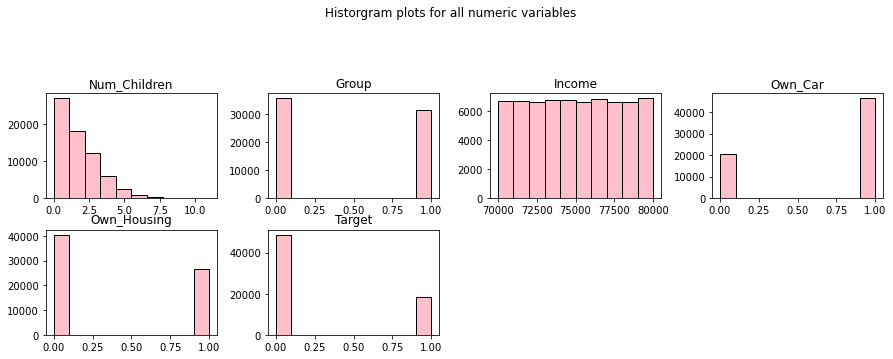

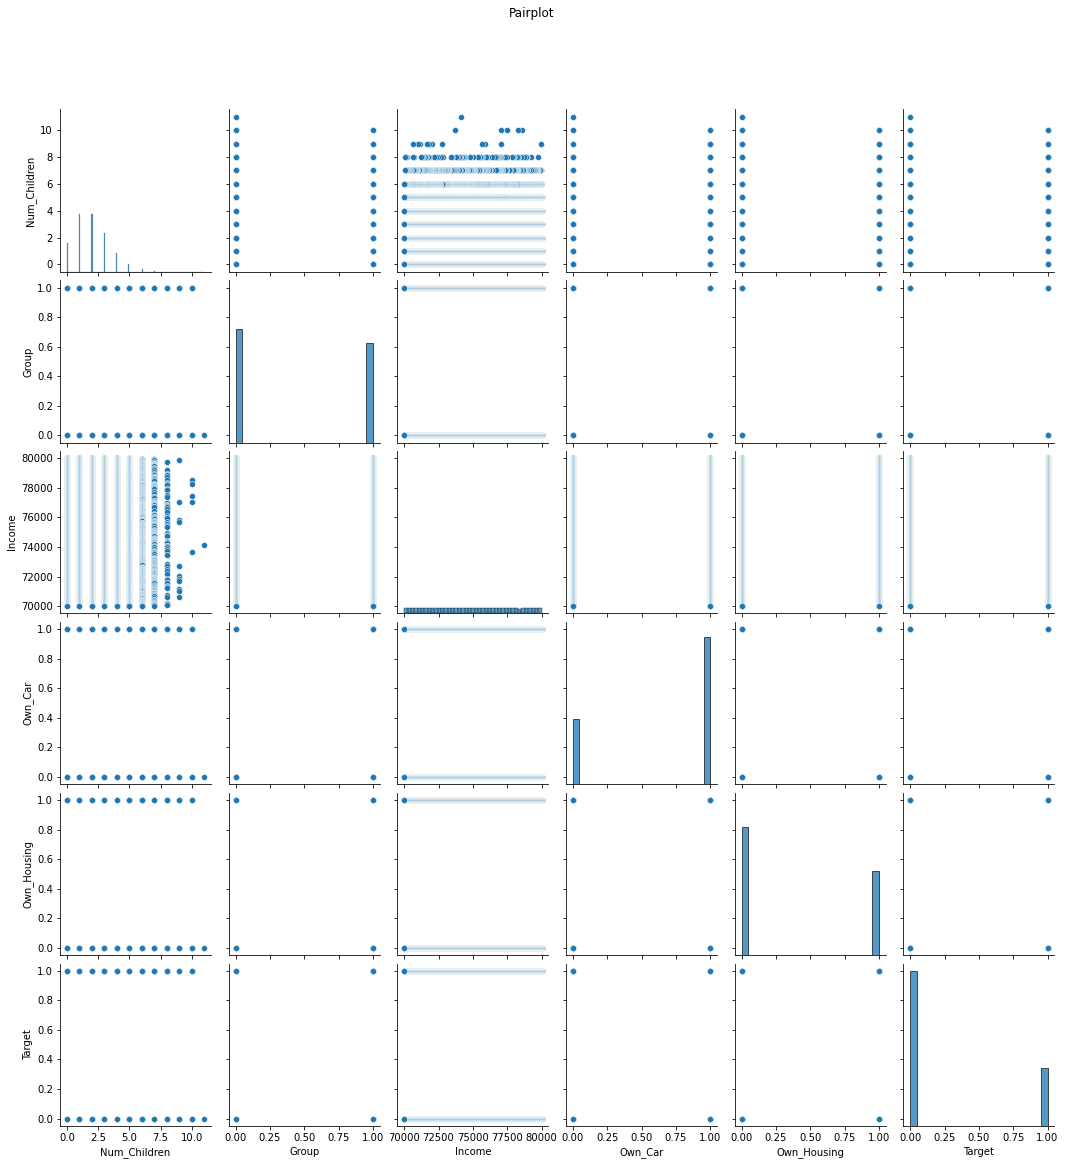

<Figure size 432x288 with 0 Axes>

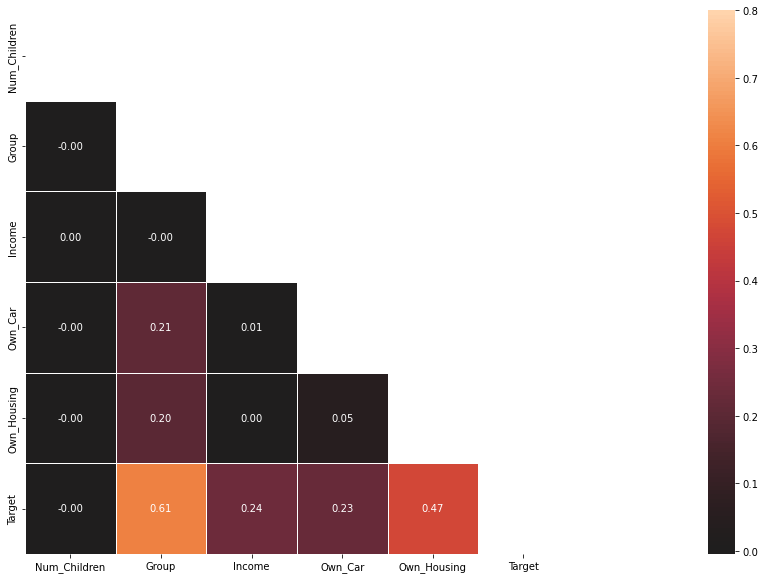

(array([[<AxesSubplot:title={'center':'Num_Children'}>,
         <AxesSubplot:title={'center':'Group'}>,
         <AxesSubplot:title={'center':'Income'}>,
         <AxesSubplot:title={'center':'Own_Car'}>],
        [<AxesSubplot:title={'center':'Own_Housing'}>,
         <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object),
 Text(0.5, 1.08, 'Pairplot'),
 <AxesSubplot:>,
 )

In [97]:
r = Report()
r.profilereporting(data,'Target')
# Must wait at least one minute

### Similar conclusions as with pandas-profiling
- Seems that income is highly correlated with Target

# Transparent Unfairness - How to Use the Functions (Now Methods) from fairdetect_classes.py

## An approach to detecting and understanding machine learning bias, by Ryan Daher

### Improvements made by Group A - MBD Part Time 2022-23

Congregating the various theoretical concepts into a practical framework, we can follow the “theoretical lens of a ‘sense-plan-act’ cycle”, as described by the HLEG framework (European Commission and Directorate-General for Communications Networks, Content and Technology, 2019). Applying this concept to the problem of ML fairness, we can break down three core steps in providing robust, and responsible artificial intelligence: Identify, Understand, and Act (IUA).

1. __Identify__: The process of exposing direct or indirect biases within a dataset and/or model.
1. __Understand__: The process of isolating impactful scenarios and obtaining trans parent explanations for outcomes.
1. __Act__: The process of reporting and rectifying identified disparities within the


By understanding the philosophical forms of unfairness as defined by our review of the literature and categorizing our prominent fairness metrics into the overarching categories of representation, ability, and performance, we can establish a series of tests to “identify” levels of disparities between sensitive groups at different levels. Merging these findings with the explainability of our models through the use of white-box models, or Shapley value estimation for black-box models, we can dig deeper into the model’s predictions, “understanding” how classifications were made, and how they varied from the natural dataset exposing both natural biases as well as added model differences. Finally, by probing further into levels of misclassification, in particular looking at negative outcomes, we can isolate groups most at risk and set up a series of “actions” that can be taken to mitigate the effects. Given this three-step framework which combines societal, legal, and technical considerations, the paper will then go through a series of cases, and examine the proposed framework.

# Let's use fairdetect_classes to find biases
For using fairdetect_classes we need create a model, for this we will:
1. Import methods from classes files__ from fairdetect_classes (done at the beginning)
1. then __load a dataset__, in this case we will use: synthetic credit card approval (already loaded with synthetic credit)
1. then __clean and prepare the dataset__ for modeling, there are some duplicates in this case, we will take care of them below
1. then we __split the data in train and test sets__ 
1. then we __build a model__, in this case we applying a Machine Learning (ML) model called XGBoost Classifier. The reason for choosing a ML is that ML models are harded to visualize, sometimes called Black Box models, what makes very difficult to see if any bias is present in the model.


<a id='3'></a>
# 3. Data Cleaning
## Transforming/coding text into numbers

## Will only work with categorical variables. In this case, since we only have integers, it won't work!

In [98]:
from fairdetect_classes import EnhancedLabelEncoder
le = EnhancedLabelEncoder()
le.fit_transform_columns(data)

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,5,0,80000,1,1,0
1,1,1,80000,0,0,1
2,2,1,80000,1,1,1
3,0,1,80000,0,0,1
4,0,0,79999,0,1,0
...,...,...,...,...,...,...
67107,3,0,70000,1,1,0
67108,1,1,70000,0,1,0
67109,2,0,70000,0,1,0
67110,1,0,70000,1,0,0


## Dropping duplicates

In [99]:
data.drop_duplicates()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,5,0,80000,1,1,0
1,1,1,80000,0,0,1
2,2,1,80000,1,1,1
3,0,1,80000,0,0,1
4,0,0,79999,0,1,0
...,...,...,...,...,...,...
67106,0,1,70000,1,0,0
67107,3,0,70000,1,1,0
67108,1,1,70000,0,1,0
67109,2,0,70000,0,1,0


In [100]:
data.to_csv("data.csv")

<a id='4'></a>
# 4. Data splitting to feed into the XGBOOST

## Splitting the data into train and test

In [101]:
from fairdetect_classes import Splitting
sp = Splitting()
X_train, X_test, y_train, y_test = sp.split_data(data,'Target') #define the dependent parameter 
print("Original data file now splitted in 4 files")

Original data file now splitted in 4 files


In [102]:
X_train.shape

(53689, 5)

In [103]:
X_test.shape

(13423, 5)

<a id='5'></a>
## 5. Training with the XGBoost model

In [104]:
#Skip if already installed
!pip install xgboost   

In [105]:
import xgboost
model = xgboost.XGBClassifier().fit(X_train, y_train)
y_test_predict = model.predict(X_test)
y_test_predict
print("Success: XGBoost model fitted")

Success: XGBoost model fitted


In [106]:
fd = FairDetect(model, X_test, y_test)

<a id='6'></a>
## 6. Testing Bias with FairDetect 
### Representation works now with classes implementation

Confusion Matrix


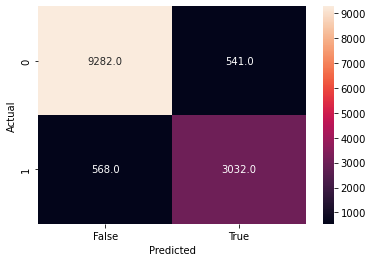

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


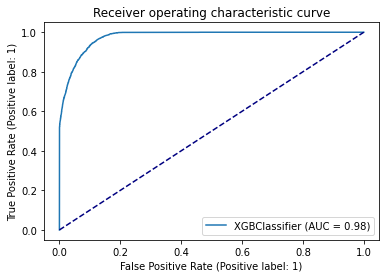

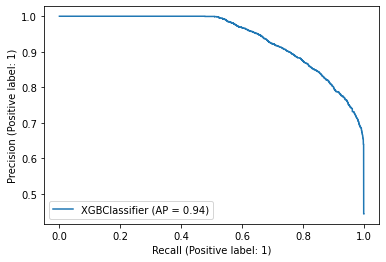

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9823
           1       0.85      0.84      0.85      3600

    accuracy                           0.92     13423
   macro avg       0.90      0.89      0.89     13423
weighted avg       0.92      0.92      0.92     13423

AUC 0.8935736989152442
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   GROUP A │   GROUP B │
╞════╪═══════════╪═══════════╡
│  0 │ 0.982165  │  0.444124 │
├────┼───────────┼───────────┤
│  1 │ 0.0178347 │  0.555876 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


*** Reject H0: Significant True Positive Disparity with p= 1.575768043818666e-14
*** Reject H0: Significant False Positive Disparity with p= 2.011531687604051e-05
Accept H0: True Negative Disparity Not Detected. p= 0.16555309181503208
*** Reject H0: Significant False Negative Disparity with p= 5.533339984010921e-14


PREDICTIVE


*** Reject H0: Significant Predictive Disparity with p= 0.0004528321676098225


In [107]:
sensitive = 'Group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - GROUP A and 1 - GROUP B Because we dont know yet what Group is referring to
fd.identify_bias('Group',labels)

## Analysing FairDetect output

With the synthetic dataset, we are provided with five, fact-based features to determine whether a candidate is a Target for a credit card. 
These are the number of children, an undefined group, the income made a year, whether you have a car or not, and, whether you own a house or not.

Among this datase, we are choosing as a sensitive group, the column Group. We do not know however if it makes reference to a civil status, gender, race, nationality or any other attribute. We know however, it is a binary attribute

To generate predictions, we will use an XGBoost classifier which received an overall train accuracy of 70% indicating moderate predictive performance in idetifying true positives and false negatives respectively

### Representation

We will begin by observing representation factors by  looking at the representation of both the GROUP labels and outcome labels (Target for a credit card). 

In this case and having undefined names for the groups, it can be seen they are similar in size. 

It can also be seen that most of the people are not a target for a credit card, with Group A having less chances of being targetted.

While the model will not train based on an unbalanced population sample due to it being symetrical, it seems to be the case Group B is the main target in credit cards, for which other factors have to be considered so to determine if there is a bias or not

REPRESENTATION

<table>
    
   <tr>
       <td></td>
       <td>GROUP A</td>
       <td>GROUP B</td>
    </tr>
   <tr>
       <td>0</td>
       <td>0.8049</td>
       <td>0.4230</td>
    </tr>
   <tr>
       <td>1</td>
       <td>0.1950</td>
       <td>0.5769</td>
    </tr>    
</table>



Testing for demographic parity, we look at the normalized contingency table between our GROUP categories and the target, running our chisquared assessment we obtain a p of 0.0, rejecting our null hypothesis of independence and indicating there is a significant relation between GROUP and the TARGET. 



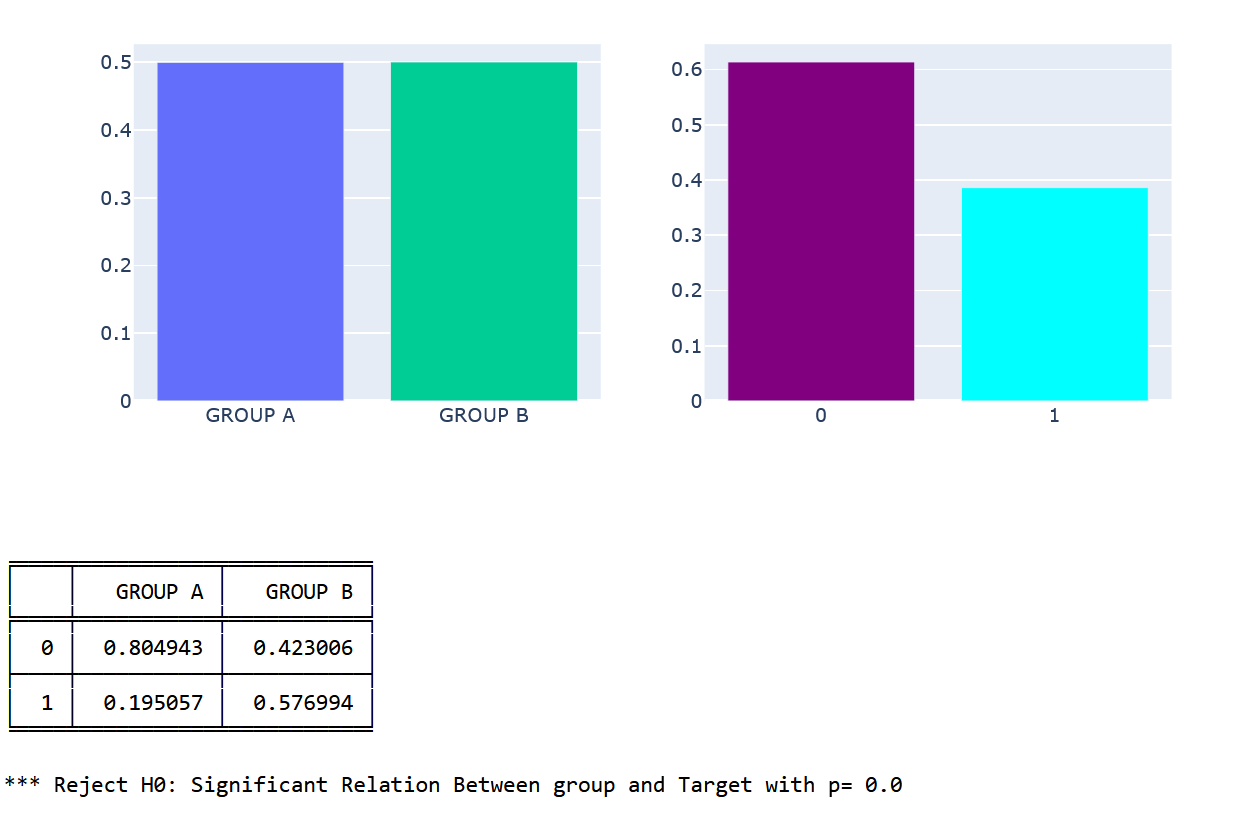

Moving then into the principle of ability, we compute our true-positive and false-positive rates for bpth groups

* True Positive Rate for GROUP A 92%
* True Positive Rate for GROUP B 97%

Based on our true positive rates, it seems as though we have a small difference between sensitive groups, however, running our chi-squared test, we obtain a p of .72, accepting our null, and indicating no significant difference between our true positive rates. This would thus satisfy equal opportunity for both GROUPS indicating both could be theoretically targetted in the same way.

* False Positive Rate for GROUP A 1%
* False Positive Rate for GROUP B 2%

In addition, the false-positive rates for both groups seem rather consistent with a p of .594, allowing us to accept our null hypothesis of no significant differences between the false-positive rates and noting similar levels of high-risk misclassifications for either group.

* True Negative Rate for GROUP A 98%
* True Negative Rate for GROUP B 97%

Looking at true negative rates in which our model correctly predicted proper low risk classifications we see similar scores for both groups supported by a p of .93, indicating similar levels of proper low-risk classifications for group.

* False Negative Rate for GROUP A: 7%
* False Negative Rate for GROUP B: 2%

Finally looking at false-negative rates we get a similar picture, it seems as though GROUP A are being incorrectly labeled as being of low TARGET at a much higher rate than GROUP B, supporting this is a p of .12, while the pvalue is still enough to accept the null hypothesis, it comes to show the possible bias towards GROUP A

* Precision for GROUP A: 92%
* Precision for GROUP B: 97%


Finally, to observe model exacerbation of biases through the lens of predictive parity, we notice a slight difference of 5 points in the precision scores for both groups. Looking at the chisquared test, however, we obtain a p of .69 signaling low significance of disparity, we are informed that the model is not greatly hindering either group, but rather enforcing  existing disparities. 

This is complimentary of our previous analysis in which we only hinted at a slight significant disparity among the false-negative rates.

Having understood the basis of the slight disparity detected, we can isolate the most affected group as being GROUP A that are incorrectly classified as being a low target for credit cards.

To further investigate, we must dive into the workings of the black-box model. To do so, we will introduce the idea of SHAP through the SHAP library. Our first
result is to observe key feature importance based on our sex cohorts.

<a id='7'></a>
## 7. SHapley Additive exPlanations (SHAP)
SHapley Additive exPlanations (SHAP): The Shapley value is a solution concept in cooperative game theory. It was named in honor of Lloyd Shapley, who introduced it in 1951 and won the Nobel Memorial Prize in Economic Sciences for it in 2012. The objective of this value is to provide the marginal contribution an individual has to a coalition’s output. By observing all the different ways we can compose this coalition, through the inclusion and exclusion of members, and finding the differences in outputs based on individual presence, the shapely value gives us the contribution each member has provided (Roth, 1988). SHapley Additive exPlanations (SHAP) apply this ideology to machine learning models, relating the individuals to features in a dataset, and the coalition output as the predicted value of the model (Lundberg and Lee, 2017).

In [108]:
!pip install shap

In [109]:
#pip install markupsafe===2.1.1

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Model Importance Comparison


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


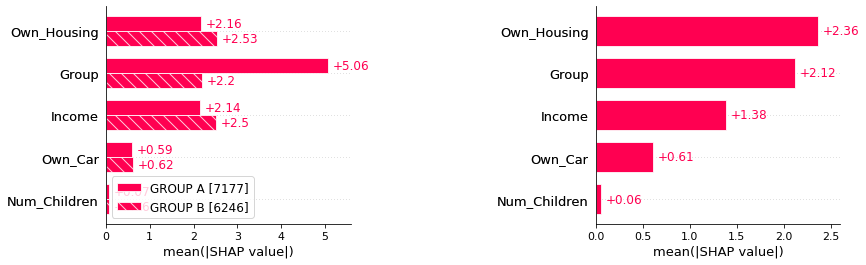

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


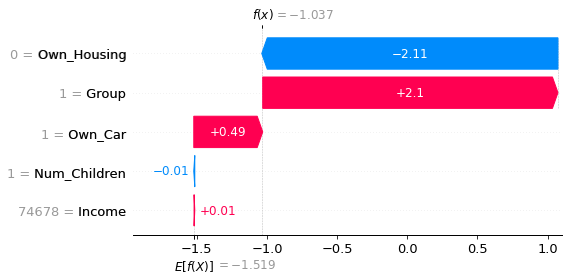

In [110]:
sensitive = 'Group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - Female and 1 - Male
fd.understand_shap(labels,sensitive,1,0)

Observing the graph on the left, we can see the overall feature importance, where the deal breaker is the income made in the year.

On the right we see GROUP A isolated. In the previous analysis we saw that even though the pvalue showed no disparity between the false negatives, group A had 5 points of difference. When running the SHAP, we can see the weight of the variables have on GROUP A. It seems that belonging to the group and the income this group makes have a significant weight as opposed to just the income in the general view. But not only that, also owning a house has an impact. Because we only have limited information, it is still risky to reassure what is this group actually making reference to. 

## Need to clear SHAP graph to analyse this carefully. I stop here :)

Selecting a random case, we can immediately see our hypothesis in play, as the credit amount of the individual had a significant influence on the model’s decision to predict the candidate as having low risk. However, noticing their checking account label of 0, and cross-checking it with our dataset original labels, we are aware of the candidate being labeled as having a “little” checking account.

Looking at another random case we again see a similar picture. Although the candidate has a very small checking account, the credit amount and duration pushed the model towards a low-credit risk classification.

Finally, by looking at the differences in the average values of the three primary model factors, we can see that the average male, incorrectly labeled as being of low risk tends to have lower checking account labels, a higher credit amount, as well as duration as opposed to people who were correctly labeled as having no risk. Moving into the final “act” stage of our ramework, we can hypothesize that certain men, with small checking accounts, but with higher than average credit amounts and durations could be subject to further inspection to minimize the privilege and minimize risk for the bank. Finally, to culminate the research results, we go into our final case of the synthetic credit card approval dataset in which we will use a Neural Network to cover another model and provide a different view of opaqueness.

# Documentation of methods (docstrings)

In [111]:
print (fairdetect_classes.Report.__doc__)

 
        NAME: Report

        DESCRIPTION: A report module based on Seaborn
        Report takes the imported data set and returns a distribution of each of the variables without having to call seaborn.pairplot

        PARAMETERS: data (pandas dataframe) and dependent variable 

        RETURNS: Pairplots, violin and heatmap graphs made in seaborn

    


In [112]:
print (fairdetect_classes.Backup.__doc__)

 
        NAME: Backup

        DESCRIPTION: A duplication method to backup the original dataset

        PARAMETERS: data (pandas dataframe)

        RETURNS: A new dataframe with backed up data

    


In [113]:
print (fairdetect_classes.EnhancedLabelEncoder.__doc__)

 
        NAME: LabelEncoder

        DESCRIPTION: Takes columns in original dataset and prompts user for a label in each of them

        PARAMETERS: data (pandas dataframe)

        RETURNS: Same dataframe with recoded names for columns

    


In [114]:
print (fairdetect_classes.Splitting.__doc__)

 
        NAME: Splitting

        DESCRIPTION: Splits original dataset in X and y by removing all independent variables. X are the independent variables for a model, with the dependent already taken out
        y is the dependent variable already isolated

        PARAMETERS: data (pandas dataframe), dependent (dependent variables)

        RETURNS: X_train, X_test, y_train, y_test (with an 80-20% ratio for train and test respectively)

    


In [115]:
print (fairdetect_classes.FairDetect.__doc__)

 
        NAME: FairDetect

        DESCRIPTION: A method framework to detect bias in classification datasets

        PARAMETERS: Check individual method

        RETURNS: Check individual method
    


In [116]:
print (fairdetect_classes.FairDetect.__init__.__doc__)

Instatiation of model, X_test and y_test


In [117]:
print (fairdetect_classes.FairDetect.create_labels.__doc__)

None


In [118]:
print (fairdetect_classes.FairDetect.representation.__doc__)


        METHOD: representation

        DESCRIPTION: Performs a chi-test and a xg-boost prediction to
        understand the relation between the original ratio, and the 
        predictions of the classifier. Based on this, the chi test is done
        between the attribute chosen (sensitive variable), and the target
        variable. It will automatically accept or reject the null hypothesis

        PARAMETERS: The sensitive group, labels previously defined, and predictions

        RETURNS: Accept or reject the null hypothesis between sensitive and target
        


In [119]:
print (fairdetect_classes.FairDetect.ability.__doc__)


        METHOD: ability

        DESCRIPTION: A method to obtain the TPR, TNR, FPR, FNR and store it 
        as a variable

        PARAMETERS: sens_df returned in the representation method and the labels

        RETURNS: TPR, FNR, FPR, TNR
        


In [120]:
print (fairdetect_classes.FairDetect.ability_plots.__doc__)


        METHOD: ability_plots

        DESCRIPTION: Method to plot bars with each of the rates for positives
        and negatives as previously obtained in ability

        PARAMETERS: labels,TPR,FPR,TNR,FNR

        RETURNS: A bar plot
        


In [121]:
print (fairdetect_classes.FairDetect.ability_metrics.__doc__)


        METHOD: ability_metrics

        DESCRIPTION: Method to test the null hypothesis between TPR, FPR, TNR and FNR
        respectively with a given p value

        PARAMETERS: TPR,FPR,TNR,FNR

        RETURNS: A message accepting or rejecting the null hypothesis
        


In [122]:
print (fairdetect_classes.FairDetect.predictive.__doc__)


        METHOD: predictive

        PARAMETERS: sens_df, labels

        RETURNS: precision_dic,fig,pred_p
        


In [123]:
print (fairdetect_classes.FairDetect.identify_bias.__doc__)


        METHOD: identify_bias

        DESCRIPTION: Identifies the bias by comparing the average of all attributes
        to one group vs to all groups in a graphical manner

        PARAMETERS: The sensitive group and the labels

        RETURNS: Accepts or rejects the null hypothesis
        


In [124]:
print (fairdetect_classes.FairDetect.understand_shap.__doc__)


        METHOD: understand_shap

        DESCRIPTION: Identifies the bias by comparing the average of all attributes
        to one group vs to all groups in a graphical manner. The group is the
        previously identified as the affected one

        PARAMETERS: The sensitive group, labels, affected group and affected target

        RETURNS: A graph
        


# Google´s What if tool

# Sections 
* [Libaries used](#0)
* [1. Test Datset](#1)
* [2. Feature Engineering](#2)  
  * [2.1 Data Cleaning](#2.1)
  * [2.2 Splitting the Dataset](#2.2)
* [3. Model Prediction](#3) 
* [4. WHat if tool](#4)

<a id='0'></a>
## Libaries and pip installments used

In [125]:
import sys
python_version = sys.version_info[0]

In [126]:
# If you're running on Colab, you'll need to install the What-if Tool package and authenticate on the TF instance
def pip_install(module):
    if python_version == '2':
        !pip install {module} --quiet
    else:
        !pip3 install {module} --quiet

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    pip_install('witwidget')

    from google.colab import auth
    auth.authenticate_user()

In [127]:
!pip install witwidget

In [128]:
!jupyter nbextension install --py --symlink --sys-prefix witwidget

2022-07-26 19:45:27.650420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-26 19:45:27.650479: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Installing C:\Users\Stephanie\anaconda3\lib\site-packages\witwidget\static -> wit-widget
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable witwidget --py --sys-prefix
    


In [129]:
!jupyter nbextension enable --py --sys-prefix witwidget

2022-07-26 19:45:37.206507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-26 19:45:37.206569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Enabling notebook extension wit-widget/extension...
      - Validating: ok


In [130]:
import pandas as pd
import numpy as np
import witwidget

from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

<a id='1'></a>
## 1.Test Dataset

In [131]:
import pandas as pd
data = pd.read_csv("synthetic_credit_card_approval_70to80.csv")
data

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,5,0,80000,1,1,0
1,1,1,80000,0,0,1
2,2,1,80000,1,1,1
3,0,1,80000,0,0,1
4,1,0,80001,1,0,0
...,...,...,...,...,...,...
67183,4,0,90000,1,0,1
67184,1,0,90000,1,0,1
67185,1,1,90000,1,0,1
67186,1,0,90000,0,0,0


<a id='2'></a>
## 2. Feature Engineering
<a id='2.1'></a>
### 2.1. Data Cleaning 

In [132]:
data = data.fillna(0)

<a id='2.2'></a>
### 2.2. Splitting Dataset

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X = data.drop(["Target"],axis=1) # axis: {0 or ‘index’, 1 or ‘columns’}, default 0
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)
print("Data sucessfully loaded!")

Data sucessfully loaded!


In [134]:
X_train.to_csv("X_train.csv")

In [135]:
X_test.to_csv("X_test.csv")

In [136]:
y_train.to_csv("y_train.csv")

In [137]:
y_test.to_csv("y_test.csv")

In [138]:
X_test = X_test.to_numpy()

In [139]:
y_test = y_test.to_numpy()

In [140]:
X_test

array([[    0,     0, 82440,     0,     0],
       [    1,     0, 80055,     1,     0],
       [    1,     0, 89422,     0,     0],
       ...,
       [    0,     1, 81163,     1,     1],
       [    4,     1, 82476,     1,     1],
       [    2,     0, 81289,     1,     0]], dtype=int64)

<a id='3'></a>
## 3. Model Prediciton

In [141]:
# Combine the features and labels into one array for the What if Tool
test_examples = np.hstack((X_test,y_test.reshape(-1,1)))

In [142]:
!pip install xgboost

In [143]:
import xgboost
model = xgboost.XGBClassifier().fit(X_train, y_train)
y_test_predict = model.predict(X_test)
y_test_predict

array([0, 0, 0, ..., 1, 1, 0])

<a id='4'></a>
## 4. What if tool 

Create a WitConfigBuilder to pass various parameters about your model and your AI Platform Prediction project to the What-If Tool. You can use the What-If Tool to inspect one model, or to compare two models. Fill in the appropriate values for your own Google Cloud project, your AI Platform Prediction model and version, and other values as appropriate for your model.

### Several JSON files in directory, tried all, yet error still appears

In [144]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="folkloric-grid-353308-1ac2537b3581.json"

In [145]:
# Create a What-if Tool visualization, it may take a minute to load
# See the cell below this for exploration ideas

# This prediction adjustment function is needed as this xgboost model's
# prediction returns just a score for the positive class of the binary
# classification, wherea  the What-If Tool expects a list of scores for each
# class (in this case, both the negative class and the positive class).
# PROJECT_ID = 'fairdetect'
# MODEL_NAME = 'Whatif'
# VERSION_NAME = 'v1'
# TARGET_FEATURE = 'Target'
# LABEL_VOCAB = ['0', '1']


def adjust_prediction(y_test_predict):
  return [1 - y_test_predict, y_test_predict]

config_builder = (WitConfigBuilder(test_examples.tolist(), data.columns.tolist() + ['Target'])
    .set_ai_platform_model('folkloric-grid-353308', 'Whatif', 'v2')
    .set_target_feature('Target')
    .set_label_vocab([0, 1]))
WitWidget(config_builder, height=1000)

WitWidget(config={'model_type': 'classification', 'label_vocab': [0, 1], 'feature_names': ['Num_Children', 'Gr…

## Team A - MBD Part Time 2022 - 23